In [2]:
from fbprophet import Prophet
import pandas as pd
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
def mse(y_actual, y_predicted, print_val=True):
    """
    Args:
    -----
    y_actual - Array of actual target values
    y_predicted - Array of predicted target values
    print_val - If `True` (default), RMSE will be
                printed. Otherwise, it will be 
                returned.
    """
    err = mean_squared_error(y_actual, y_predicted)
    if print_val:
        print('MSE: {:,.4f}'.format(err))
    else:
        return err

def plot_forecast(actual, pred, title='Actual vs Forecast', 
                  xlabel='Date', ylabel='Number of Subway Entries', 
                  grid=True, figsize=(10, 5)):
    
    if len(actual) != len(pred):
        return_str = 'Unequal lengths error: '
        return_str += '({} actual, '.format(len(actual))
        return_str += '{} forecast)'.format(len(pred))
        return return_str
    
    plt.figure(figsize=figsize)
    plt.plot(actual, label='Actual')
    plt.plot(actual.index, pred, label='Predicted', c='r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(actual.index.date[::7], 
               actual.index.day[::7])
    plt.xlim(min(actual.index.date), max(actual.index.date))
    plt.legend(loc=0)
    plt.grid(True)


In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
DATA_PATH = "/content/drive/MyDrive/Data"
df_preCovid_train = pickle.load(open(DATA_PATH+'/preCovid_stdized_train.pkl','rb'))
df_preCovid_test = pickle.load(open(DATA_PATH+'/preCovid_stdized_test.pkl','rb'))

In [7]:
df_preCovid_train.tail()

,entries,entries_scaled
date,,
2019-10-27,2454751.0,-1.901283
2019-10-28,5473994.0,0.710850
2019-10-29,5753986.0,0.953088
2019-10-30,5811028.0,1.002439
2019-10-31,5696923.0,0.903720


In [176]:
df_preCovid_test.head()

,entries,entries_scaled
date,,
2019-11-01,5874053.0,1.056966
2019-11-02,3544664.0,-0.958332
2019-11-03,3239804.0,-1.222085
2019-11-04,5469635.0,0.707079
2019-11-05,5332981.0,0.588851


In [177]:
# creating a new df for prophet test
preCovid_prophet = df_preCovid_train.copy(deep=True)
preCovid_prophet['ds'] = preCovid_prophet.index
preCovid_prophet['y'] = preCovid_prophet['entries_scaled']
preCovid_prophet.reset_index(inplace=True)
preCovid_prophet = preCovid_prophet[['ds', 'y']]

In [178]:
preCovid_prophet.shape

(1763, 2)

In [179]:
# fitting df to prophet
m = Prophet()
m.fit(preCovid_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [191]:
future = m.make_future_dataframe(periods=121)
forecast = m.predict(future)

In [192]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1879,2020-02-25,0.476475,-0.004406,0.919078
1880,2020-02-26,0.612682,0.139664,1.098416
1881,2020-02-27,0.593484,0.143843,1.051007
1882,2020-02-28,0.578326,0.106272,1.055564
1883,2020-02-29,-1.175177,-1.622877,-0.724641


Figure(720x432)


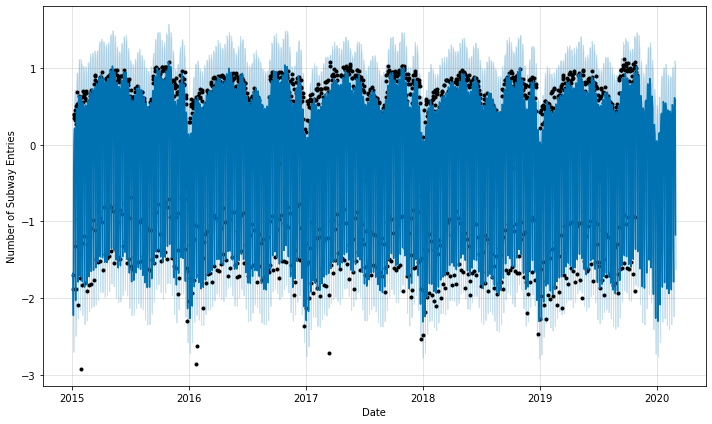

In [193]:
print(m.plot(forecast, xlabel='Date', ylabel='Number of Subway Entries'))

Figure(648x648)


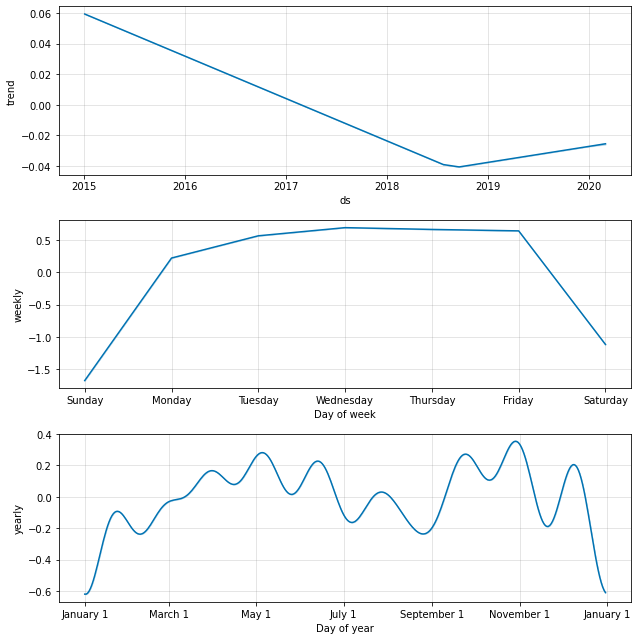

In [194]:
print(m.plot_components(forecast))

In [196]:
len(df_preCovid_test.entries_scaled)

121

MSE: 0.27


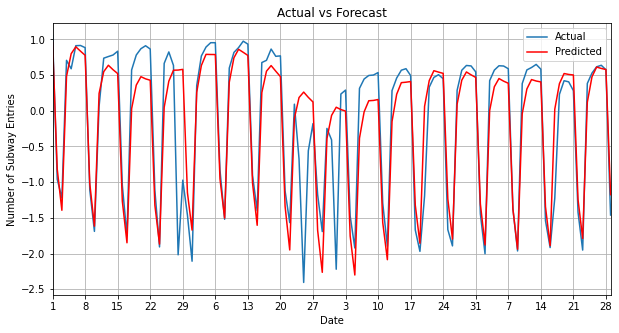

In [205]:
# predict 4 months (2019.11~2020.02)
pred = pd.DataFrame(forecast.yhat[-121:])
plot_forecast(df_preCovid_test.entries_scaled, pred)
mse(df_preCovid_test.entries_scaled[:121], pred)

In [212]:
plot_plotly(m, forecast)

In [208]:
plot_components_plotly(m, forecast)

## Train MSE

In [217]:
train_forecast = forecast[forecast.ds < '2019-11-01']
train_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1758,2019-10-27,-0.028971,-1.826999,-0.889526,-0.028971,-0.028971,-1.335638,-1.335638,-1.335638,-1.675272,-1.675272,-1.675272,0.339634,0.339634,0.339634,0.0,0.0,0.0,-1.364609
1759,2019-10-28,-0.028942,0.047523,1.047129,-0.028942,-0.028942,0.571047,0.571047,0.571047,0.222554,0.222554,0.222554,0.348493,0.348493,0.348493,0.0,0.0,0.0,0.542105
1760,2019-10-29,-0.028914,0.384076,1.355909,-0.028914,-0.028914,0.920234,0.920234,0.920234,0.566809,0.566809,0.566809,0.353426,0.353426,0.353426,0.0,0.0,0.0,0.891320
1761,2019-10-30,-0.028885,0.511796,1.458618,-0.028885,-0.028885,1.047272,1.047272,1.047272,0.693189,0.693189,0.693189,0.354082,0.354082,0.354082,0.0,0.0,0.0,1.018386
1762,2019-10-31,-0.028857,0.519982,1.465815,-0.028857,-0.028857,1.015739,1.015739,1.015739,0.665526,0.665526,0.665526,0.350213,0.350213,0.350213,0.0,0.0,0.0,0.986882


Figure(720x432)


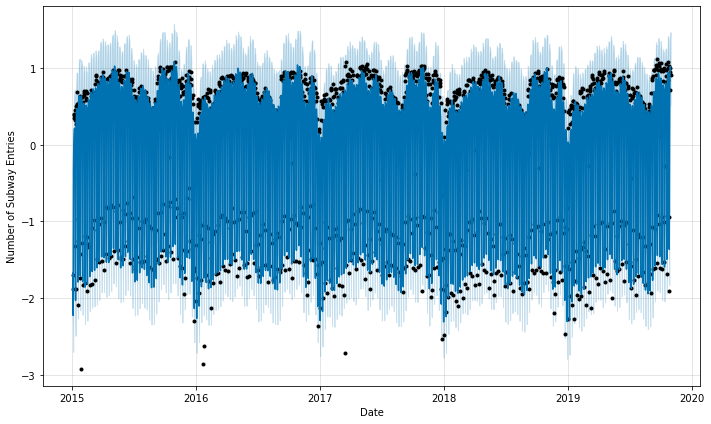

In [219]:
print(m.plot(train_forecast, xlabel='Date', ylabel='Number of Subway Entries'))

MSE: 0.13


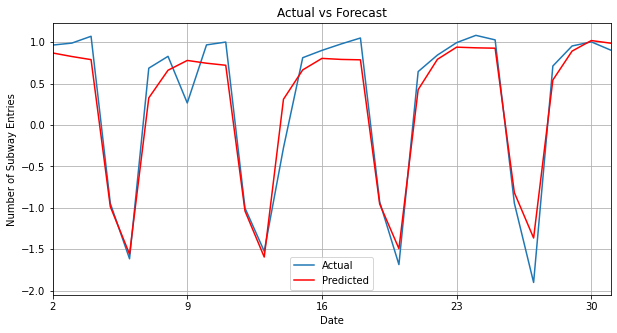

In [222]:
# TODO: include error-bar
pred = pd.DataFrame(train_forecast.yhat)
plot_forecast(df_preCovid_train.entries_scaled[-30:], pred[-30:])
mse(df_preCovid_train.entries_scaled, pred)

## Predict Post-Covid 4 months

In [3]:
df_postCovid = pickle.load(open(DATA_PATH+'/postCovid_stdized.pkl','rb'))
df_postCovid.tail()

NameError: ignored

In [225]:
future = m.make_future_dataframe(periods=243)
future.tail()

,ds
2001,2020-06-26
2002,2020-06-27
2003,2020-06-28
2004,2020-06-29
2005,2020-06-30


In [226]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2001,2020-06-26,-0.022037,0.139883,1.088486,-0.023716,-0.020221,0.632145,0.632145,0.632145,0.643256,0.643256,0.643256,-0.011112,-0.011112,-0.011112,0.0,0.0,0.0,0.610107
2002,2020-06-27,-0.022009,-1.660717,-0.687706,-0.023696,-0.020177,-1.152124,-1.152124,-1.152124,-1.116062,-1.116062,-1.116062,-0.036063,-0.036063,-0.036063,0.0,0.0,0.0,-1.174133
2003,2020-06-28,-0.021980,-2.225159,-1.315319,-0.023675,-0.020134,-1.734963,-1.734963,-1.734963,-1.675272,-1.675272,-1.675272,-0.059691,-0.059691,-0.059691,0.0,0.0,0.0,-1.756943
2004,2020-06-29,-0.021952,-0.341297,0.589087,-0.023652,-0.020095,0.140964,0.140964,0.140964,0.222554,0.222554,0.222554,-0.081590,-0.081590,-0.081590,0.0,0.0,0.0,0.119013
2005,2020-06-30,-0.021923,0.003344,0.919710,-0.023630,-0.020049,0.465414,0.465414,0.465414,0.566809,0.566809,0.566809,-0.101395,-0.101395,-0.101395,0.0,0.0,0.0,0.443491


In [229]:
forecast[-122:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1884,2020-03-01,-0.025376,-2.200932,-1.238729,-0.026005,-0.024761,-1.704386,-1.704386,-1.704386,-1.675272,-1.675272,-1.675272,-0.029114,-0.029114,-0.029114,0.0,0.0,0.0,-1.729761
1885,2020-03-02,-0.025347,-0.280875,0.613826,-0.025986,-0.024725,0.197000,0.197000,0.197000,0.222554,0.222554,0.222554,-0.025554,-0.025554,-0.025554,0.0,0.0,0.0,0.171652
1886,2020-03-03,-0.025319,0.038657,0.971108,-0.025968,-0.024693,0.543966,0.543966,0.543966,0.566809,0.566809,0.566809,-0.022843,-0.022843,-0.022843,0.0,0.0,0.0,0.518647
1887,2020-03-04,-0.025290,0.161178,1.137806,-0.025946,-0.024661,0.672427,0.672427,0.672427,0.693189,0.693189,0.693189,-0.020762,-0.020762,-0.020762,0.0,0.0,0.0,0.647137
1888,2020-03-05,-0.025261,0.166701,1.073636,-0.025925,-0.024615,0.646452,0.646452,0.646452,0.665526,0.665526,0.665526,-0.019074,-0.019074,-0.019074,0.0,0.0,0.0,0.621190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,2020-06-26,-0.022037,0.139883,1.088486,-0.023716,-0.020221,0.632145,0.632145,0.632145,0.643256,0.643256,0.643256,-0.011112,-0.011112,-0.011112,0.0,0.0,0.0,0.610107
2002,2020-06-27,-0.022009,-1.660717,-0.687706,-0.023696,-0.020177,-1.152124,-1.152124,-1.152124,-1.116062,-1.116062,-1.116062,-0.036063,-0.036063,-0.036063,0.0,0.0,0.0,-1.174133
2003,2020-06-28,-0.021980,-2.225159,-1.315319,-0.023675,-0.020134,-1.734963,-1.734963,-1.734963,-1.675272,-1.675272,-1.675272,-0.059691,-0.059691,-0.059691,0.0,0.0,0.0,-1.756943
2004,2020-06-29,-0.021952,-0.341297,0.589087,-0.023652,-0.020095,0.140964,0.140964,0.140964,0.222554,0.222554,0.222554,-0.081590,-0.081590,-0.081590,0.0,0.0,0.0,0.119013


MSE: 12.0022


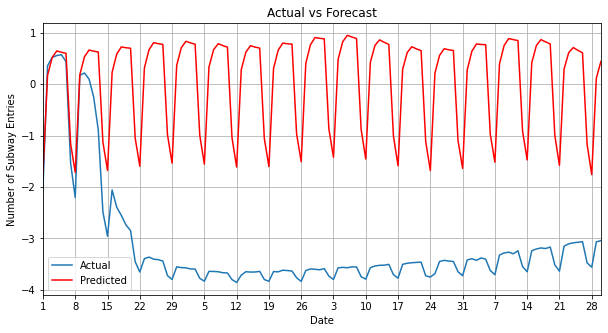

In [233]:
pred = pd.DataFrame(forecast.yhat)
plot_forecast(df_postCovid.entries_scaled, pred[-122:])
mse(df_postCovid.entries_scaled, pred[-122:])

## TAXI PROPHET

### TEST MSE

In [112]:
df_preCovid_newtaxi = pd.read_csv(DATA_PATH+'/new_taxi.csv')

In [81]:
df_preCovid_newtaxi_train = df_preCovid_newtaxi[df_preCovid_newtaxi.pickup_datetime < '2019-11-01']
df_preCovid_newtaxi = df_preCovid_newtaxi[~(df_preCovid_newtaxi.pickup_datetime < '2019-11-01')]
df_preCovid_newtaxi_test = df_preCovid_newtaxi[df_preCovid_newtaxi.pickup_datetime < '2020-03-01']
df_postCovid_newtaxi = df_preCovid_newtaxi[~(df_preCovid_newtaxi.pickup_datetime < '2020-03-01')]

In [82]:
df_preCovid_newtaxi_train.set_index('pickup_datetime', inplace=True)
df_preCovid_newtaxi_train.drop('trip_distance', axis=1, inplace=True)
df_preCovid_newtaxi_train.index.rename('date', inplace=True)

df_preCovid_newtaxi_test.set_index('pickup_datetime', inplace=True)
df_preCovid_newtaxi_test.drop('trip_distance', axis=1, inplace=True)
df_preCovid_newtaxi_test.index.rename('date', inplace=True)

df_postCovid_newtaxi.set_index('pickup_datetime', inplace=True)
df_postCovid_newtaxi.drop('trip_distance', axis=1, inplace=True)
df_postCovid_newtaxi.index.rename('date', inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [93]:
df_preCovid_newtaxi_test

,passenger_count,entries_scaled
date,,
2019-11-01,882342,2.038193
2019-11-02,896943,2.107430
2019-11-03,745910,1.391244
2019-11-04,660234,0.984975
2019-11-05,651008,0.941226
...,...,...
2020-02-25,758225,1.449640
2020-02-26,782302,1.563811
2020-02-27,856357,1.914974


In [84]:
# standardize the data 
scaler = StandardScaler()
scaler.fit(df_preCovid_newtaxi_train)
print(scaler.mean_)
df_preCovid_newtaxi_train['entries_scaled'] = scaler.transform(df_preCovid_newtaxi_train)
df_preCovid_newtaxi_test['entries_scaled'] = scaler.transform(df_preCovid_newtaxi_test) 
df_postCovid_newtaxi['entries_scaled'] = scaler.transform(df_postCovid_newtaxi)

[452517.28895184]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [85]:
# creating a new df for prophet test
preCovid_prophet = df_preCovid_newtaxi_train.copy(deep=True)
preCovid_prophet['ds'] = preCovid_prophet.index
preCovid_prophet['y'] = preCovid_prophet['entries_scaled']
preCovid_prophet.reset_index(inplace=True)
preCovid_prophet = preCovid_prophet[['ds', 'y']]
print(preCovid_prophet.head(2))
print(preCovid_prophet.shape)

           ds         y
0  2015-01-01 -1.776930
1  2015-01-02 -1.852597
(1765, 2)


In [86]:
# fitting df to prophet
m = Prophet(daily_seasonality=True)
m.fit(preCovid_prophet)

In [87]:
future = m.make_future_dataframe(periods=121)
forecast = m.predict(future)

In [88]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1881,2020-02-25,1.658624,1.381251,1.936552
1882,2020-02-26,1.738359,1.451756,2.018467
1883,2020-02-27,1.859511,1.566589,2.133889
1884,2020-02-28,2.046535,1.765841,2.336408
1885,2020-02-29,2.184153,1.918985,2.463471


Figure(720x432)


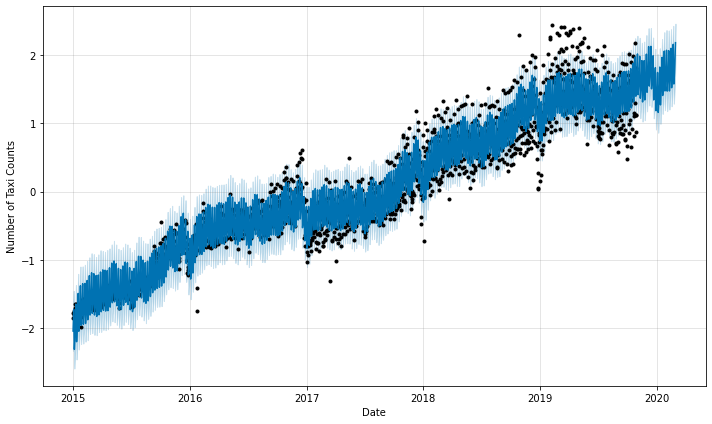

In [89]:
print(m.plot(forecast, xlabel='Date', ylabel='Number of Taxi Counts'))

Figure(648x864)


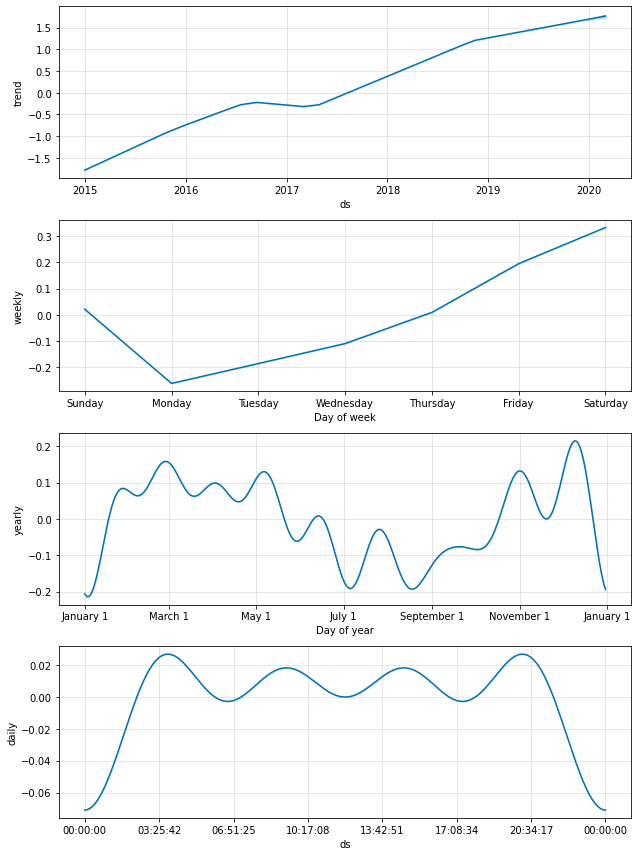

In [90]:
print(m.plot_components(forecast))

MSE: 0.1403


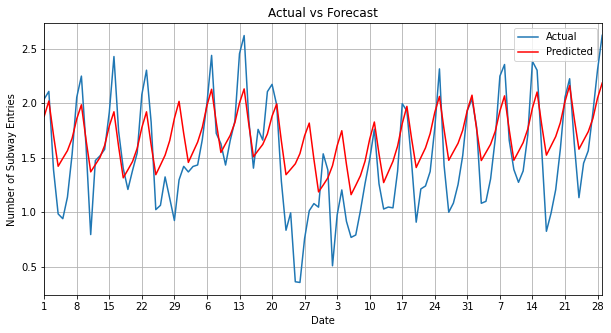

In [94]:
# predict 4 months (2019.11~2020.02)
df_preCovid_newtaxi_test.index = pd.to_datetime(df_preCovid_newtaxi_test.index)
pred = pd.DataFrame(forecast.yhat[-121:])
plot_forecast(df_preCovid_newtaxi_test.entries_scaled, pred)
mse(df_preCovid_newtaxi_test.entries_scaled[:121], pred)

### train mse

In [96]:
train_forecast = forecast[forecast.ds < '2019-11-01']
train_forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1760,2019-10-27,1.617510,1.403705,1.934086,1.617510,1.617510,0.055663,0.055663,0.055663,-0.070991,-0.070991,-0.070991,0.021193,0.021193,0.021193,0.105461,0.105461,0.105461,0.0,0.0,0.0,1.673173
1761,2019-10-28,1.618693,1.114912,1.684983,1.618693,1.618693,-0.219214,-0.219214,-0.219214,-0.070991,-0.070991,-0.070991,-0.262047,-0.262047,-0.262047,0.113824,0.113824,0.113824,0.0,0.0,0.0,1.399478
1762,2019-10-29,1.619875,1.202704,1.754207,1.619875,1.619875,-0.136400,-0.136400,-0.136400,-0.070991,-0.070991,-0.070991,-0.186214,-0.186214,-0.186214,0.120805,0.120805,0.120805,0.0,0.0,0.0,1.483475
1763,2019-10-30,1.621057,1.282230,1.829075,1.621057,1.621057,-0.054692,-0.054692,-0.054692,-0.070991,-0.070991,-0.070991,-0.109957,-0.109957,-0.109957,0.126257,0.126257,0.126257,0.0,0.0,0.0,1.566365
1764,2019-10-31,1.622239,1.407132,1.974110,1.622239,1.622239,0.068044,0.068044,0.068044,-0.070991,-0.070991,-0.070991,0.008971,0.008971,0.008971,0.130064,0.130064,0.130064,0.0,0.0,0.0,1.690284


In [97]:
print(len(train_forecast))

1765


Figure(720x432)


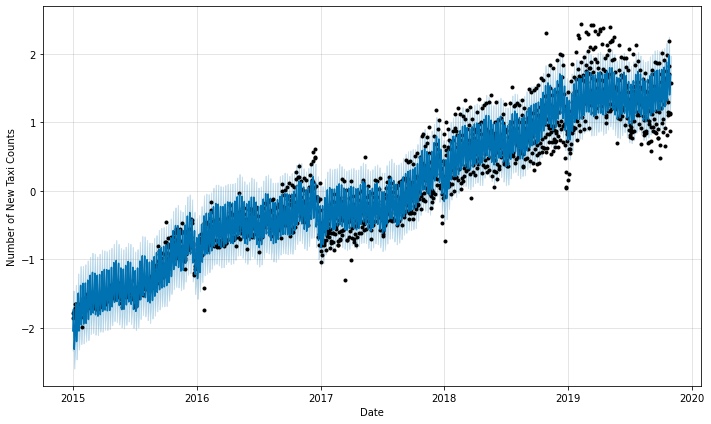

In [98]:
print(m.plot(train_forecast, xlabel='Date', ylabel='Number of New Taxi Counts'))

MSE: 0.0474


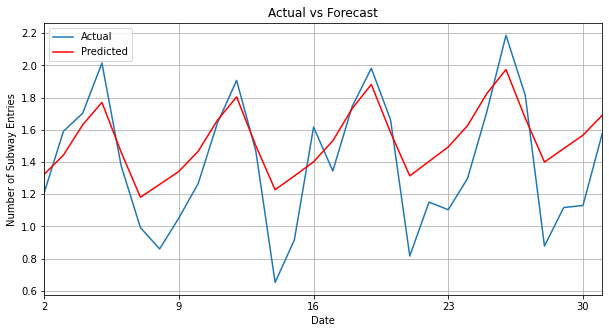

In [100]:
# TODO: include error-bar
df_preCovid_newtaxi_train.index = pd.to_datetime(df_preCovid_newtaxi_train.index)
pred = pd.DataFrame(train_forecast.yhat)
plot_forecast(df_preCovid_newtaxi_train.entries_scaled[-30:], pred[-30:])
mse(df_preCovid_newtaxi_train.entries_scaled, pred)

### Post-Covid Prediction

In [101]:
future = m.make_future_dataframe(periods=243)
future.tail()

,ds
2003,2020-06-26
2004,2020-06-27
2005,2020-06-28
2006,2020-06-29
2007,2020-06-30


In [102]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2003,2020-06-26,1.904800,1.592304,2.231742,1.770950,2.050814,0.010548,0.010548,0.010548,-0.070991,-0.070991,-0.070991,0.195052,0.195052,0.195052,-0.113513,-0.113513,-0.113513,0.0,0.0,0.0,1.915348
2004,2020-06-27,1.905983,1.714165,2.366920,1.771435,2.052701,0.134691,0.134691,0.134691,-0.070991,-0.070991,-0.070991,0.333001,0.333001,0.333001,-0.127319,-0.127319,-0.127319,0.0,0.0,0.0,2.040674
2005,2020-06-28,1.907165,1.376627,2.015184,1.771921,2.054295,-0.190190,-0.190190,-0.190190,-0.070991,-0.070991,-0.070991,0.021193,0.021193,0.021193,-0.140392,-0.140392,-0.140392,0.0,0.0,0.0,1.716975
2006,2020-06-29,1.908347,1.099246,1.726066,1.772406,2.056484,-0.485491,-0.485491,-0.485491,-0.070991,-0.070991,-0.070991,-0.262047,-0.262047,-0.262047,-0.152452,-0.152452,-0.152452,0.0,0.0,0.0,1.422856
2007,2020-06-30,1.909529,1.180691,1.789486,1.772891,2.058536,-0.420442,-0.420442,-0.420442,-0.070991,-0.070991,-0.070991,-0.186214,-0.186214,-0.186214,-0.163237,-0.163237,-0.163237,0.0,0.0,0.0,1.489088


In [105]:
forecast[-122:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1886,2020-03-01,1.766476,1.594330,2.144285,1.720832,1.812629,0.104311,0.104311,0.104311,-0.070991,-0.070991,-0.070991,0.021193,0.021193,0.021193,0.154109,0.154109,0.154109,0.0,0.0,0.0,1.870786
1887,2020-03-02,1.767658,1.307106,1.844819,1.721486,1.814449,-0.182820,-0.182820,-0.182820,-0.070991,-0.070991,-0.070991,-0.262047,-0.262047,-0.262047,0.150218,0.150218,0.150218,0.0,0.0,0.0,1.584838
1888,2020-03-03,1.768840,1.365403,1.926132,1.722141,1.816083,-0.111915,-0.111915,-0.111915,-0.070991,-0.070991,-0.070991,-0.186214,-0.186214,-0.186214,0.145290,0.145290,0.145290,0.0,0.0,0.0,1.656925
1889,2020-03-04,1.770022,1.449956,1.998384,1.722795,1.818031,-0.041487,-0.041487,-0.041487,-0.070991,-0.070991,-0.070991,-0.109957,-0.109957,-0.109957,0.139461,0.139461,0.139461,0.0,0.0,0.0,1.728535
1890,2020-03-05,1.771205,1.566081,2.132970,1.723450,1.819937,0.070875,0.070875,0.070875,-0.070991,-0.070991,-0.070991,0.008971,0.008971,0.008971,0.132895,0.132895,0.132895,0.0,0.0,0.0,1.842079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,2020-06-26,1.904800,1.592304,2.231742,1.770950,2.050814,0.010548,0.010548,0.010548,-0.070991,-0.070991,-0.070991,0.195052,0.195052,0.195052,-0.113513,-0.113513,-0.113513,0.0,0.0,0.0,1.915348
2004,2020-06-27,1.905983,1.714165,2.366920,1.771435,2.052701,0.134691,0.134691,0.134691,-0.070991,-0.070991,-0.070991,0.333001,0.333001,0.333001,-0.127319,-0.127319,-0.127319,0.0,0.0,0.0,2.040674
2005,2020-06-28,1.907165,1.376627,2.015184,1.771921,2.054295,-0.190190,-0.190190,-0.190190,-0.070991,-0.070991,-0.070991,0.021193,0.021193,0.021193,-0.140392,-0.140392,-0.140392,0.0,0.0,0.0,1.716975
2006,2020-06-29,1.908347,1.099246,1.726066,1.772406,2.056484,-0.485491,-0.485491,-0.485491,-0.070991,-0.070991,-0.070991,-0.262047,-0.262047,-0.262047,-0.152452,-0.152452,-0.152452,0.0,0.0,0.0,1.422856


MSE: 7.7647


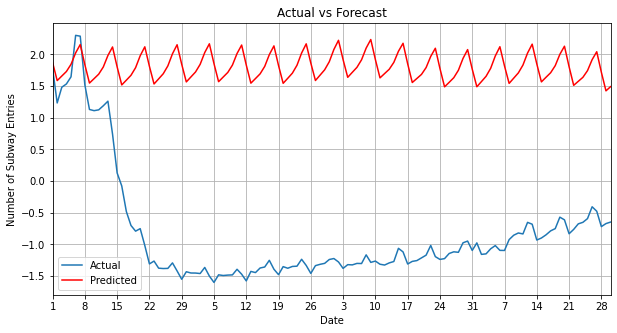

In [108]:
df_postCovid_newtaxi.index = pd.to_datetime(df_postCovid_newtaxi.index)
pred = pd.DataFrame(forecast.yhat)
plot_forecast(df_postCovid_newtaxi.entries_scaled, pred[-122:])
mse(df_postCovid_newtaxi.entries_scaled, pred[-122:])

## OLD TAXI

In [180]:
def preprocess_taxi(df):
  df.set_index('pickup_datetime', inplace=True)
  df.drop('trip_distance', axis=1, inplace=True)
  df.index.rename('date', inplace=True)
  df.index = pd.to_datetime(df.index)

  #data split
  df_preCovid_train = df[df.index < '2019-11-01']
  df = df[~(df.index < '2019-11-01')]

  df_preCovid_test = df[df.index < '2020-03-01']
  df_postCovid = df[~(df.index < '2020-03-01')]

  # standardize the data 
  scaler = StandardScaler()
  scaler.fit(df_preCovid_train)
  print(scaler.mean_)
  df_preCovid_train['entries_scaled'] = scaler.transform(df_preCovid_train)
  df_preCovid_test['entries_scaled'] = scaler.transform(df_preCovid_test) 
  df_postCovid['entries_scaled'] = scaler.transform(df_postCovid)

  return df_preCovid_train, df_preCovid_test, df_postCovid

def train_forecast(df_train, future_period):
  # creating a new df for prophet test
  try:
    preCovid_prophet = df_train.copy(deep=True)
  except:
    preCovid_prophet = df_train
  preCovid_prophet['ds'] = preCovid_prophet.index
  preCovid_prophet['y'] = preCovid_prophet['entries_scaled']
  preCovid_prophet.reset_index(inplace=True)

  preCovid_prophet = preCovid_prophet[['ds', 'y']]
  print("shape: ", preCovid_prophet.shape)

  m = Prophet(daily_seasonality=True)
  m.fit(preCovid_prophet)

  future = m.make_future_dataframe(periods=future_period)
  print("future tail: ", future.tail(2))
  forecast = m.predict(future)

  print(m.plot(forecast, xlabel='Date', ylabel='Ridership'))
  print(m.plot_components(forecast))

  return forecast


def predict(forecast, df_test, pred_period):
  pred = pd.DataFrame(forecast.yhat[-pred_period:])
  print("pred tail: ")
  print(pred.tail(2))
  plot_forecast(df_test.entries_scaled, pred)
  print("actual tail: ")
  print(df_test.entries_scaled[:pred_period].tail(2))
  mse(df_test.entries_scaled[:pred_period], pred)

In [116]:
df_preCovid_oldtaxi_train, df_preCovid_oldtaxi_test, df_oldtaxi_postCovid = preprcess_taxi(df_preCovid_oldtaxi)

[569257.80056657]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

shape:  (1765, 2)
future tail:               ds
1884 2020-02-28
1885 2020-02-29
Figure(720x432)
Figure(648x864)


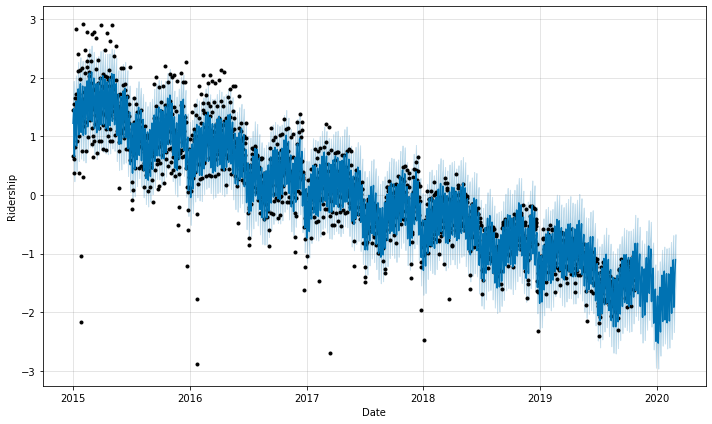

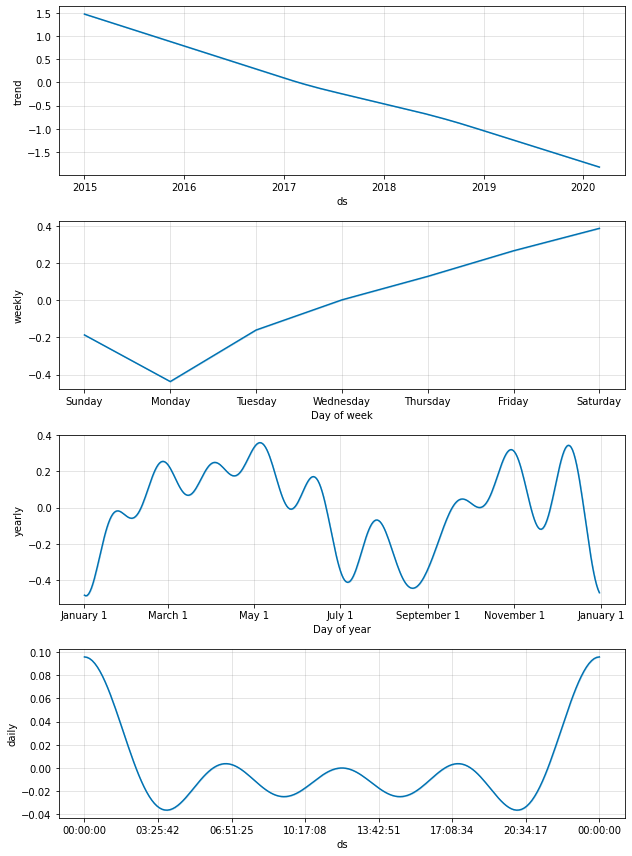

In [123]:
forecast = train_forecast(df_preCovid_oldtaxi_train, future_period=121)

MSE: 0.0806


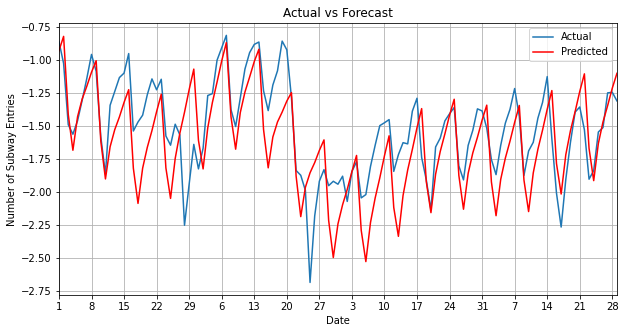

In [124]:
#test mse
predict(forecast, df_preCovid_oldtaxi_test, pred_period=121)

MSE: 0.1173


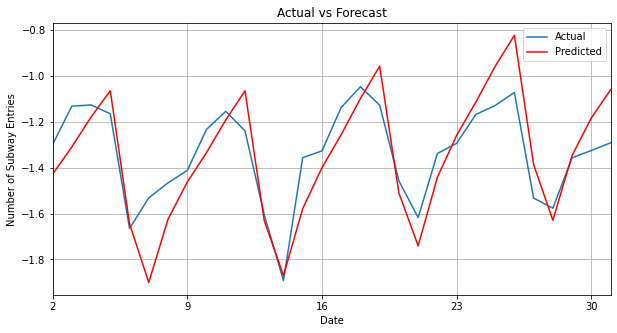

In [132]:
#train mse
train_forecast = forecast[forecast.ds < '2019-11-01']

pred = pd.DataFrame(train_forecast.yhat)
plot_forecast(df_preCovid_oldtaxi_train.entries_scaled[-30:], pred[-30:])
mse(df_preCovid_oldtaxi_train.entries_scaled, pred)

[569257.80056657]
shape:  (1765, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

future tail:               ds
2006 2020-06-29
2007 2020-06-30
Figure(720x432)
Figure(648x864)
MSE: 3.8099


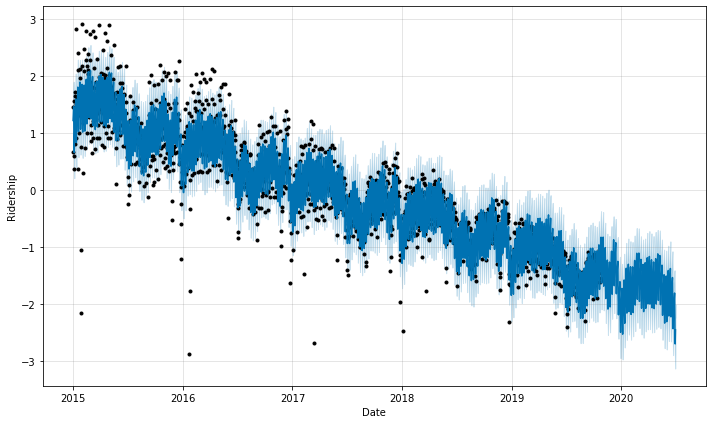

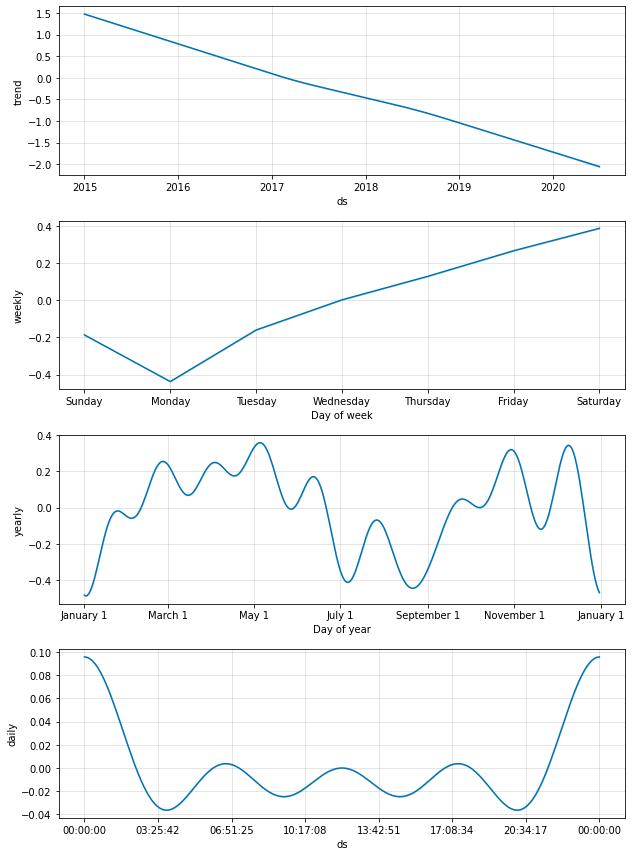

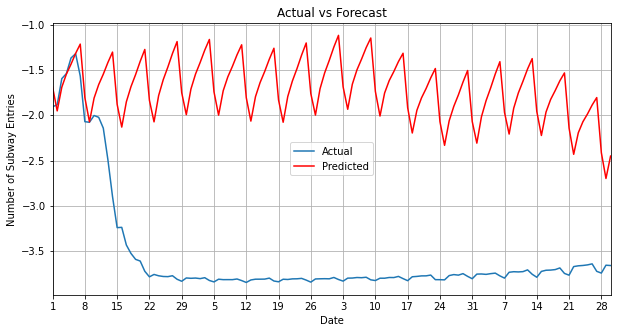

In [138]:
# predict post-covid
df_preCovid_oldtaxi = pd.read_csv(DATA_PATH+'/old_taxi.csv')
df_preCovid_oldtaxi_train, df_preCovid_oldtaxi_test, df_oldtaxi_postCovid = preprcess_taxi(df_preCovid_oldtaxi)
forecast = train_forecast(df_preCovid_oldtaxi_train, future_period=243)
predict(forecast, df_oldtaxi_postCovid, pred_period=122)

## CitiBike

In [166]:
df_citibike = pd.read_csv(DATA_PATH+'/citibike_1520.csv')
df_citibike.tail()

,Unnamed: 0,starttime_day,usertype,tripduration,tripdistance
2118,26,2020-10-27,78030,969.498424,1.266052
2119,27,2020-10-28,62847,993.646172,1.244965
2120,28,2020-10-29,19072,861.612154,1.117977
2121,29,2020-10-30,39546,910.687023,1.123494
2122,30,2020-10-31,66771,1147.853140,1.267373


In [181]:
def preprocess_citibike(df):
  df.set_index('starttime_day', inplace=True)
  df.drop(['tripdistance', 'tripduration', 'Unnamed: 0'], axis=1, inplace=True)
  df.index.rename('date', inplace=True)
  df.index = pd.to_datetime(df.index)

  #data split
  df_preCovid_train = df[df.index < '2019-11-01']
  df = df[~(df.index < '2019-11-01')]

  df_preCovid_test = df[df.index < '2020-03-01']
  df_postCovid = df[~(df.index < '2020-03-01')]
  df_postCovid = df_postCovid[(df_postCovid.index < '2020-07-01')]

  # standardize the data 
  scaler = StandardScaler()
  scaler.fit(df_preCovid_train)
  print(scaler.mean_)
  df_preCovid_train['entries_scaled'] = scaler.transform(df_preCovid_train)
  df_preCovid_test['entries_scaled'] = scaler.transform(df_preCovid_test) 
  df_postCovid['entries_scaled'] = scaler.transform(df_postCovid)

  return df_preCovid_train, df_preCovid_test, df_postCovid

In [167]:
df_preCovid_citibike_train, df_preCovid_citibike_test, df_postCovid_citibike = preprcess_citibike(df_citibike)

[43120.44336938]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



shape:  (1757, 2)
future tail:               ds
1876 2020-02-28
1877 2020-02-29
Figure(720x432)
Figure(648x864)


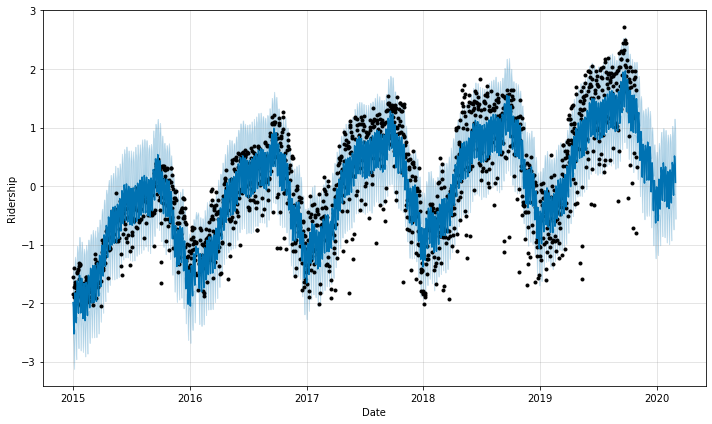

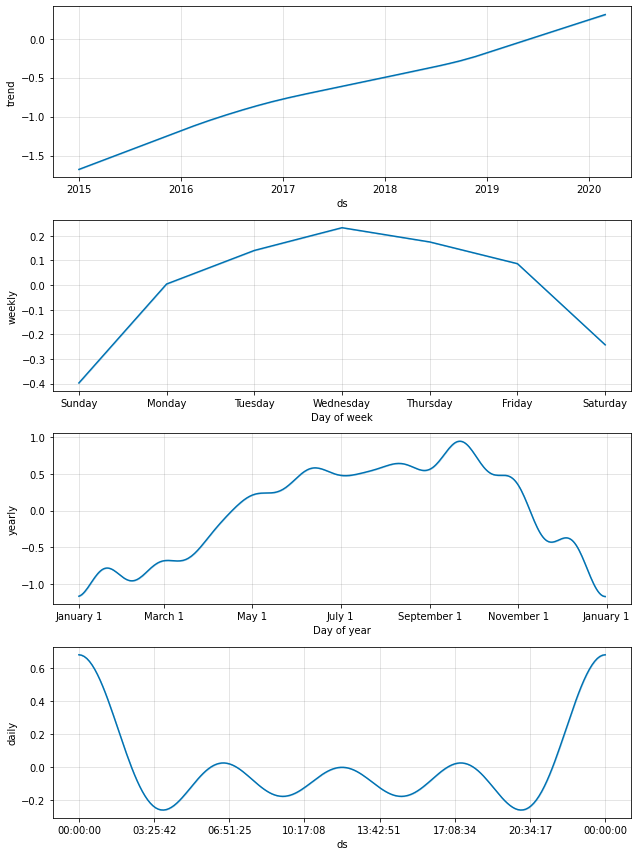

In [169]:
forecast = train_forecast(df_preCovid_citibike_train, future_period=121)

MSE: 0.4695


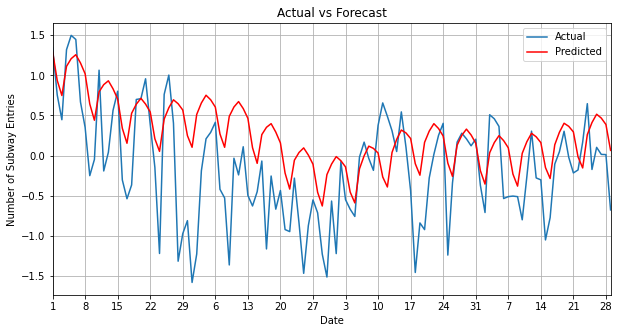

In [170]:
#test mse
predict(forecast, df_preCovid_citibike_test, pred_period=121)

MSE: 0.2308


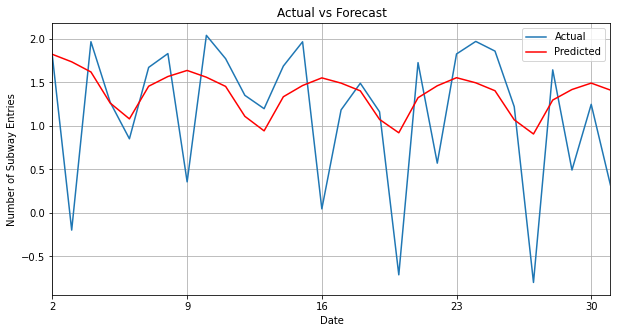

In [174]:
#train mse
train_forecast = forecast[forecast.ds < '2019-11-01']

pred = pd.DataFrame(train_forecast.yhat)
plot_forecast(df_preCovid_citibike_train.entries_scaled[-30:], pred[-30:])
mse(df_preCovid_citibike_train.entries_scaled, pred)

In [182]:
# predict post-covid
df_citibike = pd.read_csv(DATA_PATH+'/citibike_1520.csv')
df_preCovid_citibike_train, df_preCovid_citibike_test, df_postCovid_citibike = preprocess_citibike(df_citibike)

[43120.44336938]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



shape:  (1757, 2)
future tail:               ds
1998 2020-06-29
1999 2020-06-30
Figure(720x432)
Figure(648x864)
pred tail: 
          yhat
1998  1.622072
1999  1.755254
actual tail: 
date
2020-06-29    0.902470
2020-06-30    1.075006
Name: entries_scaled, dtype: float64
MSE: 2.3388


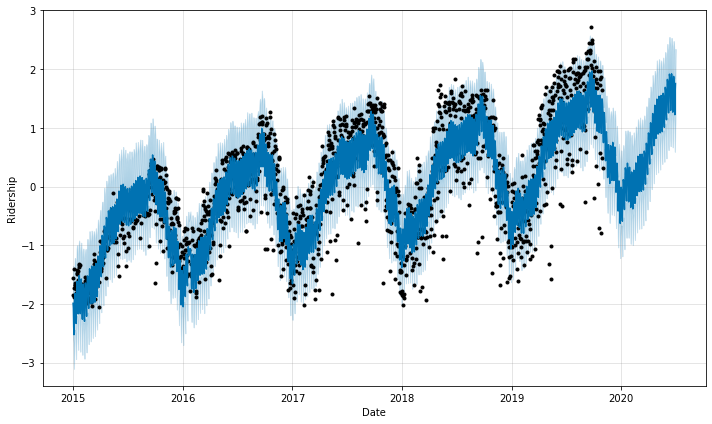

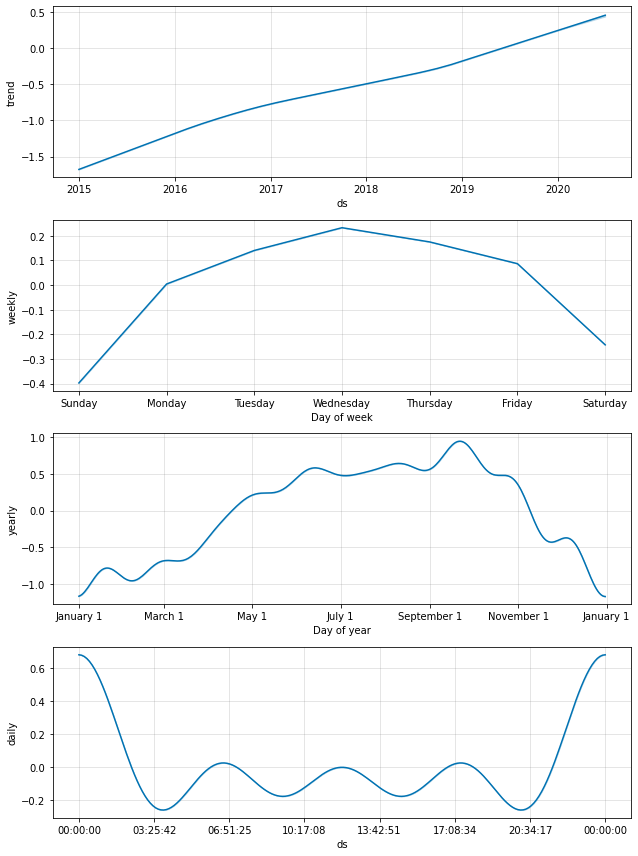

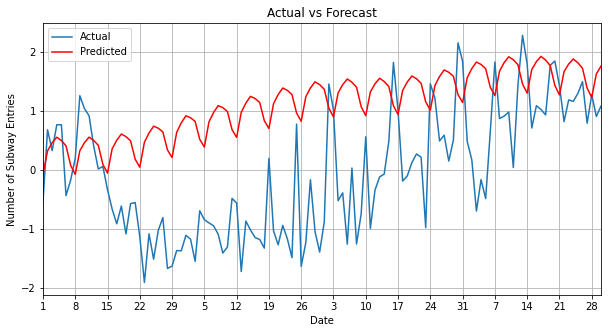

In [183]:
forecast = train_forecast(df_preCovid_citibike_train, future_period=243)
predict(forecast, df_postCovid_citibike, pred_period=122)